In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from pydlm import dlm, trend, dynamic
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('VCB.csv')
df = df.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,6/1/2018,43216,41017,43595,40866,7.57M,5.36%
1,6/4/2018,44960,42837,45187,42458,4.90M,4.04%
2,6/5/2018,44429,44429,45187,43747,4.51M,-1.18%
3,6/6/2018,44808,44050,45263,43671,2.79M,0.85%
4,6/7/2018,44505,44732,44960,44278,3.24M,-0.68%
...,...,...,...,...,...,...,...
1237,5/15/2023,91700,92000,93000,91200,450.50K,-1.19%
1238,5/16/2023,92600,92000,93100,91300,666.10K,0.98%
1239,5/17/2023,92800,92500,93000,92300,572.70K,0.22%
1240,5/18/2023,95000,92900,96000,92200,1.68M,2.37%


In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = pd.read_csv('VCB.csv')
df = df[['Price','Date','High']]
print(df)
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

      Price       Date   High
0     43216   6/1/2018  43595
1     44960   6/4/2018  45187
2     44429   6/5/2018  45187
3     44808   6/6/2018  45263
4     44505   6/7/2018  44960
...     ...        ...    ...
1237  91700  5/15/2023  93000
1238  92600  5/16/2023  93100
1239  92800  5/17/2023  93000
1240  95000  5/18/2023  96000
1241  94200  5/19/2023  94900

[1242 rows x 3 columns]


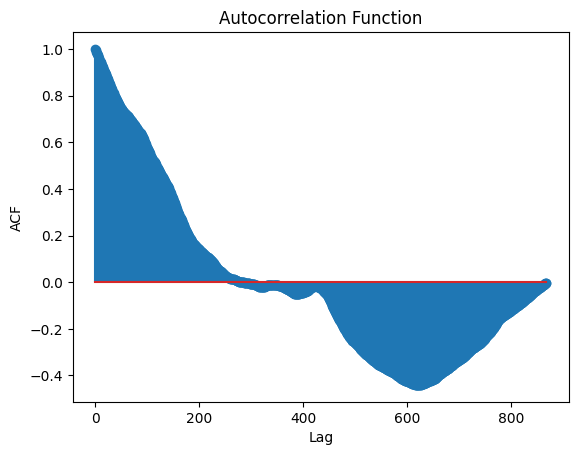

In [ ]:
# Tính toán ACF
import statsmodels.api as sm
acf = sm.tsa.stattools.acf(train_data['Price'], nlags= 1000
                           )

# Vẽ đồ thị ACF
plt.stem(acf)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function')
plt.show()

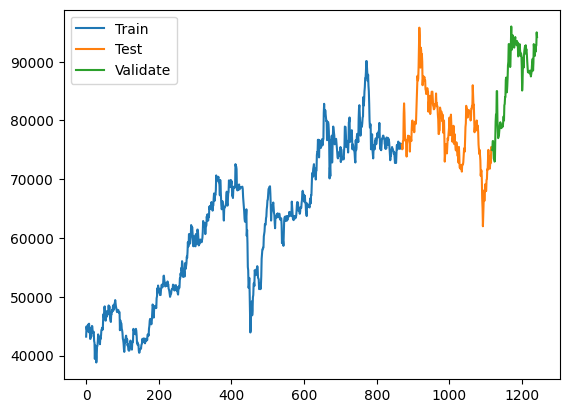

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index,val_data['Price'])
plt.legend(['Train', 'Test','Validate',])
plt.show()

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

feature = []
for price in train_data['High']:
  feature.append([price])
print(feature)
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason
model = dlm(y_train)
model = model + trend(1, name='lineTrend', w=1.0)
model = model + autoReg(degree=3, data=y_train, name='ar1', w=1e7) + longSeason(period=8, stay=1, data=y_train, name='monthly', w=3.0) + dynamic(features=feature, discount=1, name='High')


[[43595], [45187], [45187], [45263], [44960], [45794], [45718], [44732], [45415], [45415], [44732], [44732], [42837], [44505], [44126], [44505], [45642], [45036], [45870], [44505], [44505], [44278], [44202], [42837], [42155], [42003], [42761], [42079], [39804], [40638], [41624], [42079], [42306], [43595], [43823], [43368], [44278], [43519], [43519], [42989], [43444], [43519], [44960], [44884], [44732], [45263], [45187], [46931], [47310], [47538], [48144], [48372], [48372], [48068], [46249], [47689], [47386], [47538], [47765], [47614], [47462], [48144], [48751], [48599], [48675], [48523], [47462], [46855], [46249], [47159], [47462], [47841], [48220], [48068], [48827], [48523], [47993], [48296], [48978], [49812], [49812], [49433], [49206], [48675], [48523], [48144], [47841], [48144], [48523], [48379], [47919], [47765], [47612], [46076], [45999], [46076], [45769], [45999], [45461], [45001], [45154], [44002], [43465], [42390], [42927], [41391], [41698], [43542], [42927], [43234], [43388], 

C:\Users\giangle\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydlm\modeler\autoReg.py:75: UserWarning: The data argument in autoReg is deprecated. Please avoid using it.
  warn('The data argument in autoReg is deprecated. Please avoid using it.')


In [ ]:

model.fit()

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [ ]:
# 4. Quá trình testing
x_test= []

for price in test_data['High']:
  x_test.append([price])
print(np.array(x_test).shape)
y_test = np.array(test_data['Price'])
y_pred = model.predictN(date = model.n-1, N=len(x_test),featureDict={'High': x_test})
y_pred = y_pred[0]

(248, 1)


In [ ]:

y_val = np.array(val_data['Price'])
x_val= []

for price in val_data['High']:
  x_val.append([price])
print(type(x_val))

size = test_size + val_size
y_pred_val = model.predictN(featureDict={'High': x_val}, N = len(x_val))
y_pred_val = y_pred_val[0]
print(y_pred_val)

<class 'list'>
[75460.10403299167, 77107.9882290391, 75507.63521252823, 76230.90009895958, 75465.92225635587, 75473.12248558948, 72803.80107104227, 74025.70827809523, 73051.20611394443, 77191.79401337374, 78786.98077998044, 79854.47017495726, 79787.09150850582, 83345.77686013121, 84171.0665475612, 82371.42584543864, 79372.4989960598, 79084.01832113325, 77505.65697166252, 79396.04279873568, 77726.28415483984, 78971.60585625887, 79223.31865871322, 81521.82946774298, 78876.39121646625, 80878.53177167213, 79441.58845268603, 79863.34504135374, 79652.6416579229, 79562.24954645605, 79178.13504247757, 80689.30908855158, 80729.41552690495, 81593.61573068296, 80882.57581788299, 81311.57919295314, 82273.33754266401, 82968.87190399469, 84842.13261364742, 87153.32027371431, 84007.29035108132, 82903.96250859677, 84165.4310612113, 85909.49062176015, 86687.69699306373, 88124.47871818436, 92507.0899613607, 89847.79165406131, 88705.67940078521, 87842.47102478673, 89049.74297022108, 88136.82895818907, 89

In [ ]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 1954.464096765123
Testing RMSE: 3122.3487737697237
Validation MAPE: 1.9084995410971144
Testing MAPE: 3.264554038964689
Validation MAE: 1700.1059111913605
Testing MAE: 2462.009769314898


In [ ]:
# Dự đoán 30 ngày tiếp theo của feature 'High' dựa trên Linear Regression
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()

ln_model.fit(np.array(train_data.index).reshape(-1,1), train_data['High'])


#test
x_test_ln = np.array(test_data.index).reshape(-1, 1)
y_test_ln = np.array(test_data['High'])
y_pred_ln = ln_model.predict(x_test_ln)

# Quá trình Validate
x_val_ln= np.array(val_data.index).reshape(-1, 1)
y_val_ln = np.array(val_data)
y_pred_val_ln =  ln_model.predict(x_val_ln)

# Predict the prices for the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

feature_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
feature_next_30_days = ln_model.predict(feature_next_30_days)

print(feature_next_30_days)






[ 99316.11328045  99361.79276501  99407.47224957  99453.15173412
  99498.83121868  99544.51070324  99590.19018779  99635.86967235
  99681.54915691  99727.22864146  99772.90812602  99818.58761058
  99864.26709514  99909.94657969  99955.62606425 100001.30554881
 100046.98503336 100092.66451792 100138.34400248 100184.02348704
 100229.70297159 100275.38245615 100321.06194071 100366.74142526
 100412.42090982 100458.10039438 100503.77987893 100549.45936349
 100595.13884805 100640.81833261]


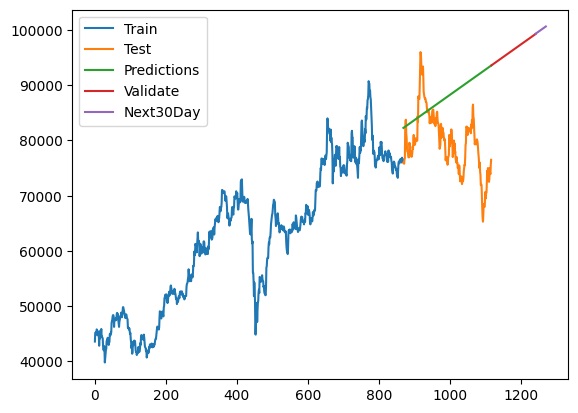

In [ ]:
plt.plot(train_data.index, train_data['High'])
plt.plot(test_data.index, test_data['High'])
plt.plot(test_data.index,y_pred_ln)
plt.plot(val_data.index,y_pred_val_ln)
plt.plot(last_data,feature_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [ ]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

x = []
for price in feature_next_30_days:
  x.append([price])
print(type(x))
num_dims = np.ndim(x)
print(num_dims)
y_next_30_days = model.predictN(featureDict={'High': x}, N = 30)
y_next_30_days = y_next_30_days[0]
print(y_next_30_days)


<class 'list'>
2
[98155.91874842126, 91977.11161241394, 95892.15872635142, 91725.51411328158, 94066.78072580662, 92745.93496977947, 93755.65106984973, 93061.07661336886, 93512.71574355332, 93377.3257513203, 93756.43227229417, 93502.78360427964, 93809.35945647387, 93764.05300569274, 93826.35853579626, 93721.49759833723, 93792.14319946065, 93914.32258529372, 94126.27311769157, 93981.78975635122, 94216.21701548022, 94218.15199368978, 94249.49906983064, 94164.98847130658, 94222.28492508938, 94353.22122932211, 94559.42282488068, 94418.71190139442, 94650.66376877997, 94654.22336081108]


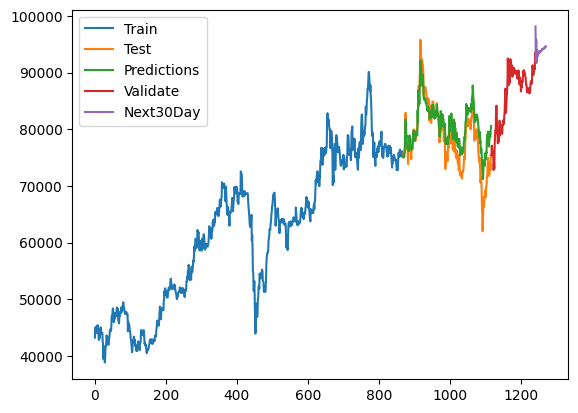

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index,y_pred)
plt.plot(val_data.index,y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()